## 17 Supervised Machine Learning

### 17.2.3 linear_regression_salary

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(Path('./resources/Salary_Data.csv'))
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


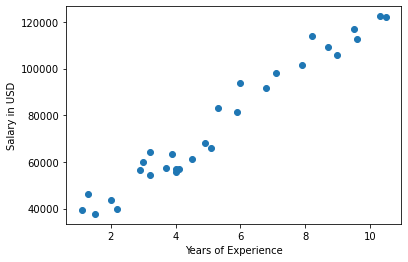

In [3]:
plt.scatter(df.YearsExperience, df.Salary)
plt.xlabel('Years of Experience')
plt.ylabel('Salary in USD')
plt.show()

In [4]:
# formats the data to meet the requirements of the Scikit-learn library:
# dataset has been separated into X and y components:
# X is the input data, and y is the output.
X = df.YearsExperience.values.reshape(-1,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [5]:
# assign the target variable, or the Salary column, to y.
y = df.Salary
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [6]:
# next step is to create an instance of the linear regression model. 
# An object is instantiated, or created, from sklearn.linear_model's
# LinearRegression class.
model = LinearRegression()

In [7]:
# learning stage called fitting or training
model.fit(X, y)

LinearRegression()

In [8]:
# After the learning stage, the predict() method is used to generate predictions:
y_pred = model.predict(X)
print(y_pred.shape)

(30,)


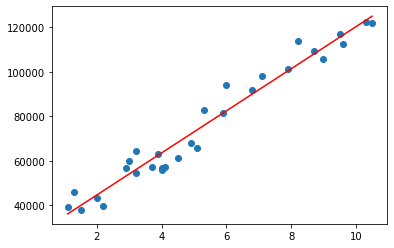

In [9]:
# plot the predictions as a red line against the data points:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [10]:
# examine the specific parameters of our model: the slope and the y-intercept.
print(model.coef_)
print(model.intercept_)

[9449.96232146]
25792.20019866871


## 17.3.1 Logistic Regression
Logistic Regression is a statistical method for predicting binary outcomes from data.

Examples of this are "yes" vs "no" or "high credit risk" vs "low credit risk".

These are categories that translate to probability of being a 0 or a 1

In [11]:
import pandas as pd
from sklearn.datasets import make_blobs

# a synthetic dataset is generated with Scikit-learn's make_blobs module.
# The centers argument specifies the number of clusters in the dataset; in
# this case there are two clusters. The random_state ensures reproducibility
# of this dataset:

X, y = make_blobs(centers=2, random_state=42)
print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


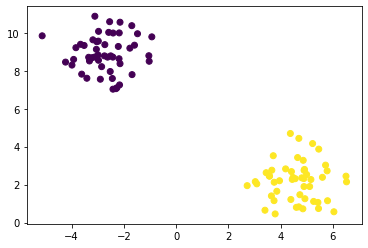

In [12]:
# The logistic regression model will be trained on this data, and it will be able to
# categorize a new data point as one of the two classes (yellow or purple):
# Classes are either 0 purple or 1 yellow
plt.scatter(X[:, 0], X[:, 1], c=y)

In [13]:
# Split the Dataset Into Train and Test Sets
# Stratifying a dataset divides it proportionally.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)


### Instantiate a Logistic Regression Model

In [14]:
# import LogisticRegression from the Scikit-learn library, and then instantiate the model.
# lbfgs' , which is an algorithm for learning and optimization.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier


LogisticRegression(random_state=1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
    intercept_scaling=1, 11_ratio=None, max_iter=100,
    multi_class='warn', n_jobs=None, penalty='12',
    random_state=1, solver='lbfgs' tol=0.0001, verbose=0,
    warm_start=False)

### Train the Logistic Regression Model

In [15]:
# train the model with the training set data USING The fit() method
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Validate the Logistic Regression Model

In [16]:
# create predictions and assemble the results into a Pandas DataFrame:
#  the predict() method to create predictions based on X_test
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


In [17]:
# we validate the model, or evaluate its performance.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

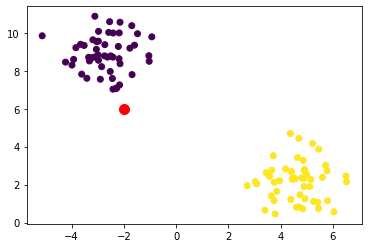

In [18]:
# create a new data point, which shows up as a red dot on the new plot.
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)
plt.show()

In [19]:
# use predict() to predict which class the new data point belongs to
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]


### 17.3.2 Logistic Regression to Predict Diabetes

In [20]:
from path import Path
import pandas as pd

In [21]:
data = Path('resources/diabetes.csv')
df = pd.read_csv(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
y = df["Outcome"]
X = df.drop(columns="Outcome")
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [23]:
# split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                    y, random_state=1, stratify=y)

# Examining the shape of the training set, 
# meaning that there are 576 samples (rows) and 8 features (cloumns)
X_train.shape

(576, 8)

In [24]:
# create a logistic regression model with the specified arguements 
# for solver, max_iter, random_state
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)

# trained the model with the training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [25]:
# Ppredictions for y-values,
y_pred = classifier.predict(X_test)
results=pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,0
8,1,1
9,0,0


In [26]:
# accuracy _ compares the actual outcome (y) values from the test set
# against the model's predicted values.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7760416666666666


In [27]:
# import the confusion_matrix, which is the table of 
# true positives, false positives, true negatives, and false negatives.
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[113  12]
 [ 31  36]]


In [28]:
# Scikitlearn's classification_report calculates the metrics of the model
# Precision = TP/(TP + FP),  recall (sensitivity) TP/(TP + FN)
# F1 = 2(Precision * Sensitivity)/(Precision + Sensitivity)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       125
           1       0.75      0.54      0.63        67

    accuracy                           0.78       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



## 17.5  Support Vector Machines (SVM)
SVM, like logistic regression, is a binary classification (yes or no. 
SVM works by separating the two classes in a dataset with
the widest possible margins

SVM Loan Approver

There are a number of classification algorithms that can be used to determine loan elgibility. Some algorithms run better than others. Build a loan approver using the SVM algorithm and compare the accuracy and performance of the SVM model with the Logistic Regression model.

In [29]:
from path import Path
import numpy as np
import pandas as pd

In [30]:
# read the data which are normalized between 0 and 1
data = Path('resources/loans.csv')
df= pd.read_csv(data)
df.head()


,assets,liabilities,income,credit_score,mortgage,status
0,0.210859,0.452865,0.281367,0.628039,0.302682,deny
1,0.395018,0.661153,0.330622,0.638439,0.502831,approve
2,0.291186,0.593432,0.438436,0.434863,0.315574,approve
3,0.458640,0.576156,0.744167,0.291324,0.394891,approve
4,0.463470,0.292414,0.489887,0.811384,0.566605,approve


In [31]:
# Segment the features from the target
y = df["status"]
X = df.drop(columns="status")

#  split the dataset into training and testing subsets using the train_test split_fuction
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1,
                                                   stratify = y)
X_train.shape

(75, 5)

In [32]:
# import the SVC module from Scikit-learn, then instantiate it.
# kernel specifies the mathematical functions used to separate the classes.
from sklearn.svm import SVC
model = SVC(kernel = 'linear')

# train the model with fit()
model.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
# create predictions with the model
y_pred = model.predict(X_test)
results = pd.DataFrame({
    "Prediction" : y_pred,
    "Actual" : y_test
}).reset_index(drop=True)
# show results
results

,Prediction,Actual
0,approve,deny
1,deny,approve
2,deny,deny
3,approve,deny
4,deny,deny
5,approve,approve
6,approve,deny
7,approve,deny
8,deny,deny
9,approve,approve


In [34]:
# assess the accuracy_score of the model
from sklearn.metrics import accuracy_score
accurycy_svm = accuracy_score(y_test, y_pred)
print(accurycy_svm)

0.6


In [35]:
# import confusion_metrix from sklearn.metrics
from sklearn.metrics import confusion_matrix, classification_report

# generate a confusion_matrix and print the classification
matrix_svm = confusion_matrix(y_test, y_pred)
print(matrix_svm)

[[7 5]
 [5 8]]


In [36]:
# import classification_report from sklearn.metrics
from sklearn.metrics import classification_report
# Generate Classification Report
report_svm = classification_report(y_test, y_pred)
print(report_svm)

              precision    recall  f1-score   support

     approve       0.58      0.58      0.58        12
        deny       0.62      0.62      0.62        13

    accuracy                           0.60        25
   macro avg       0.60      0.60      0.60        25
weighted avg       0.60      0.60      0.60        25



#### Comparision with logistic regression model

In [37]:
data = Path('resources/loans.csv')
df = pd.read_csv(data)

# Separate the Features (X) from the Target (y)
y = df["status"]
X = df.drop(columns="status")

# Split our data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(75, 5)

In [38]:
# Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier_lin = LogisticRegression(solver = 'lbfgs',
                                 max_iter = 200,
                                 random_state = 1)

# train (fit) using the train data
classifier_lin.fit(X_train, y_train)

# make prediction
y_pred_lin = classifier_lin.predict(X_test)
results_lin = pd.DataFrame({"Prediction": y_pred_lin, "Actual": y_test}).reset_index(drop=True)
results_lin

,Prediction,Actual
0,deny,deny
1,deny,approve
2,deny,deny
3,approve,deny
4,deny,deny
5,deny,approve
6,deny,deny
7,approve,deny
8,deny,deny
9,approve,approve


In [39]:
# assess the accuracy_score of the linear model
from sklearn.metrics import accuracy_score
accurycy_lin = accuracy_score(y_test, y_pred_lin)
print(accurycy_lin)

0.52


In [40]:
# import confusion_metrix from sklearn.metrics
from sklearn.metrics import confusion_matrix, classification_report

# generate a confusion_matrix and print the classification
matrix_lin = confusion_matrix(y_test, y_pred_lin)
print(matrix_lin)

[[ 3  9]
 [ 3 10]]


In [41]:
# import classification_report from sklearn.metrics
from sklearn.metrics import classification_report
# Generate Classification Report
report_lin = classification_report(y_test, y_pred_lin)
print(report_lin)

              precision    recall  f1-score   support

     approve       0.50      0.25      0.33        12
        deny       0.53      0.77      0.62        13

    accuracy                           0.52        25
   macro avg       0.51      0.51      0.48        25
weighted avg       0.51      0.52      0.48        25



In [42]:
print(report_svm)

              precision    recall  f1-score   support

     approve       0.58      0.58      0.58        12
        deny       0.62      0.62      0.62        13

    accuracy                           0.60        25
   macro avg       0.60      0.60      0.60        25
weighted avg       0.60      0.60      0.60        25



## 17.6.1 Encode Labels With Pandas

Data scientist's time is spent cleaning and preparing
data. In machine learning, too, the data rarely comes ready for analysis.

#### Dealing with Categorical Data in ML
The file loans_data.csv, contains simulated data about loans, there are a total of 500 records. Each row represents a loan application along an arbitrary year, where every column represents the following data about every loan application.

amount: The loan amount in USD.
term: The loan term in months.
month: The month of the year when the loan was requested.
age: Age of the loan applicant.
education: Educational level of the loan applicant.
gender: Gender of the loan applicant.
bad: Stands for a bad or good loan applicant (1 - bad, 0 - good).

In [43]:
# open the dataset in a Pandas DataFrame
# seven columns: six features and a target
file_path = Path("resources/loans_data.csv")
loans_df = pd.read_csv(file_path)
loans_df.head()

,amount,term,month,age,education,gender,bad
0,1000,30,June,45,High School or Below,male,0
1,1000,30,July,50,Bachelor,female,0
2,1000,30,August,33,Bachelor,female,0
3,1000,15,September,27,college,male,0
4,1000,30,October,28,college,female,0


### encoding
To use Scikit-learn's machine learning algorithms, the text features (month,
education, and gender) will have to be converted into numbers. steps taken to prepare the data to make them usable for building machine learning models are called preprocessing. Encoding text labels into numerical values is one
preprocessing step.


In [44]:
# first and the simplest encoding 
# we'll perform in this dataset is with the gender column
loans_binary_encoded = pd.get_dummies(loans_df, columns=["gender"])
loans_binary_encoded.head()

,amount,term,month,age,education,bad,gender_female,gender_male
0,1000,30,June,45,High School or Below,0,0,1
1,1000,30,July,50,Bachelor,0,1,0
2,1000,30,August,33,Bachelor,0,1,0
3,1000,15,September,27,college,0,0,1
4,1000,30,October,28,college,0,1,0


In [45]:
# encoding gender (gender_female, gender_mail)
# education (Bachelor, High School or Below , Master or Above , and college)
loans_binary_encoded = pd.get_dummies(loans_df, columns=["education", "gender"])
loans_binary_encoded.head()

,amount,term,month,age,bad,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,June,45,0,0,1,0,0,0,1
1,1000,30,July,50,0,1,0,0,0,1,0
2,1000,30,August,33,0,1,0,0,0,1,0
3,1000,15,September,27,0,0,0,0,1,0,1
4,1000,30,October,28,0,0,0,0,1,1,0


#### Encode Labels With Scikitlearn
Scikit-learn's LabelEncoder module can also transform text into numerical
data.

In [46]:
# label encoder's fit_transform() method is used to first train the
# label encoder, then convert the text data into numerical data.
# label encoder assigns a number between 0 and 3 for each of the education categories

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = loans_df.copy()
df2['education'] = le.fit_transform(df2['education'])
df2.head(10)

,amount,term,month,age,education,gender,bad
0,1000,30,June,45,1,male,0
1,1000,30,July,50,0,female,0
2,1000,30,August,33,0,female,0
3,1000,15,September,27,3,male,0
4,1000,30,October,28,3,female,0
5,300,7,July,35,2,male,0
6,1000,30,September,29,3,male,0
7,1000,30,May,36,3,male,0
8,1000,30,May,28,3,male,0
9,800,15,April,26,3,male,0


In [47]:
# transform the month column into numbers. 
# The goal is to transform each month into its corresponding order:
label_encoder = LabelEncoder()
loans_df["month_le"] = label_encoder.fit_transform(loans_df["month"])

loans_df.head()

,amount,term,month,age,education,gender,bad,month_le
0,1000,30,June,45,High School or Below,male,0,6
1,1000,30,July,50,Bachelor,female,0,5
2,1000,30,August,33,Bachelor,female,0,1
3,1000,15,September,27,college,male,0,11
4,1000,30,October,28,college,female,0,10


In [48]:
# create a dictionary of the months of the year and apply a custom function
# to convert the month names to their corresponding integers

months_num = {
"January": 1,
"February": 2,
"March": 3,
"April": 4,
"May": 5,
"June": 6,
"July": 7,
"August": 8,
"September": 9,
"October": 10,
"November": 11,
"December": 12,
}

# lambda function is applied to the month column to perform the actual conversion
loans_df["month_num"] = loans_df["month"].apply(lambda x: months_num[x])

loans_df.head()

,amount,term,month,age,education,gender,bad,month_le,month_num
0,1000,30,June,45,High School or Below,male,0,6,6
1,1000,30,July,50,Bachelor,female,0,5,7
2,1000,30,August,33,Bachelor,female,0,1,8
3,1000,15,September,27,college,male,0,11,9
4,1000,30,October,28,college,female,0,10,10


In [49]:
# cleanup—it drops the unnecessary columns related to the month:
loans_df = loans_df.drop(["month", "month_le"], axis=1)
loans_df.head()

,amount,term,age,education,gender,bad,month_num
0,1000,30,45,High School or Below,male,0,6
1,1000,30,50,Bachelor,female,0,7
2,1000,30,33,Bachelor,female,0,8
3,1000,15,27,college,male,0,9
4,1000,30,28,college,female,0,10


In [50]:
# encode multiple columns (gender, education) at the same time

loans_bin = loans_binary_encoded = pd.get_dummies(loans_df, columns=["education", "gender"])
loans_bin.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


#### 17.6.4 Scale and Normalize Data

Data scaling and normalization are steps that are sometimes necessary when
preparing data for machine learning.

In [51]:
import pandas as pd
from path import Path

# use Scikit-learn's StandardScaler module to scale data.
# The model -> fit -> predict/transform workflow is also used when scaling data
file_path = Path("resources/loans_data_encoded.csv")
encoded_df = pd.read_csv(file_path)
encoded_df.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [52]:
# import the StandardScalermodule and create an instance of it as data_scaler
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

# train the scaler and transform the data. Notice that the fit 
# and transform steps are combined into a single fit_transform() method
loans_data_scaled = data_scaler.fit_transform(encoded_df)
loans_data_scaled[:5]

array([[ 0.49337687,  0.89789115,  2.28404253, -0.81649658, -0.16890147,
        -0.39336295,  1.17997648, -0.08980265, -0.88640526, -0.42665337,
         0.42665337],
       [ 0.49337687,  0.89789115,  3.10658738, -0.81649658,  0.12951102,
         2.54218146, -0.84747452, -0.08980265, -0.88640526,  2.34382305,
        -2.34382305],
       [ 0.49337687,  0.89789115,  0.3099349 , -0.81649658,  0.42792352,
         2.54218146, -0.84747452, -0.08980265, -0.88640526,  2.34382305,
        -2.34382305],
       [ 0.49337687, -0.97897162, -0.67711892, -0.81649658,  0.72633602,
        -0.39336295, -0.84747452, -0.08980265,  1.12815215, -0.42665337,
         0.42665337],
       [ 0.49337687,  0.89789115, -0.51260995, -0.81649658,  1.02474851,
        -0.39336295, -0.84747452, -0.08980265,  1.12815215,  2.34382305,
        -2.34382305]])

In [53]:
import numpy as np
print(np.mean(loans_data_scaled[:,0]))
print(np.std(loans_data_scaled[:,0]))

-3.552713678800501e-16
0.9999999999999999


## 17.7 Decision Trees

decision trees encode a series of true/false questions that are represented by a series of if/else statements. Decision trees are one of the most interpretable models, as they provide a clear representation of how the model works.

In [54]:
# Initial module imports
import pandas as pd
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [55]:
# load data
file_path = Path("resources/loans_data_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [56]:
# define the features set for X
X = df_loans.copy()
X = X.drop("bad", axis = 1)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [57]:
# define the target set for y
y = df_loans["bad"].values
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [58]:
# Split the Data Into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 78)
# the following code, we can see the data's 75-25 split.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 10)
(125, 10)
(375,)
(125,)


In [59]:
# manually specify the desired split with the train_size parameter.
# Splitting into Train and Test sets into an 80/20 split.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=78,
                                                       train_size=0.80)
# Determine the shape of our training and testing sets.
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(400, 10)
(100, 10)
(400,)
(100,)


In [60]:
# To scale our data, we'll use the  StandardScaler as before and fit the instance,  scaler , with the 
# training data and then scale the features with the  transform() method:

# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)
# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [61]:
print(np.mean(X_train_scaled[:,0]))
print(np.mean(X_test_scaled[:,0]))
print(np.std(X_train_scaled[:,0]))
print(np.std(X_test_scaled[:,0]))

3.931669804539221e-16
0.08040483006321758
1.0
0.8450480061575104


#### 17.7.3 Make Predictions and Evaluate Results
After scaling the features data, the decision tree model can be created and
trained.

In [62]:
# Fit the Decision Tree Model
model = tree.DecisionTreeClassifier()
# Fitting the model
model = model.fit(X_train_scaled, y_train)

In [63]:
# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)
predictions

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [64]:
# Evaluate the Model_ determine how well our model classifies loan applications
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df


,Predicted 0,Predicted 1
Actual 0,52,32
Actual 1,22,19


In [65]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.568


In [66]:
# precision, recall, F1 score, and support for the two classes
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,52,32
Actual 1,22,19


Accuracy Score : 0.568
classification Report
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        84
           1       0.37      0.46      0.41        41

    accuracy                           0.57       125
   macro avg       0.54      0.54      0.54       125
weighted avg       0.59      0.57      0.58       125



### 17.8.1 Ensemble Learning
The concept of ensemble learning is the process of combining multiple models, like decision tree algorithms, to help improve the accuracy and robustness, as well as decrease variance of the model, and therefore increase the overall performance of the model

In [67]:
# Initial imports.
import pandas as pd
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [68]:
# Loading data
file_path = Path("resources/loans_data_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [69]:
# Preprocess the Data
# preprocessing steps for the loan applications' encoded data 
# so that we can fit our training and testing sets with the random forest model
# Define the features set.
X = df_loans.copy()
X = X.drop("bad", axis=1)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [70]:
# define the target set using the  ravel() method, which performs the same 
# procedure on our target set data as the values attribute.
# Define the target set.
y = df_loans["bad"].ravel()
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [71]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [72]:
# create the StandardScaler instance, fit the scaler with
# the training set, and scale the data.

# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)
# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

array([[ 0.49582979, -0.93913666,  0.62959256, ..., -0.93541435,
         2.38671921, -2.38671921],
       [ 0.49582979,  0.92029442, -0.69123099, ...,  1.06904497,
        -0.41898519,  0.41898519],
       [ 0.49582979,  0.92029442, -1.18653982, ..., -0.93541435,
        -0.41898519,  0.41898519],
       ...,
       [ 0.49582979,  0.92029442, -0.85633394, ..., -0.93541435,
        -0.41898519,  0.41898519],
       [ 0.49582979, -0.93913666,  0.13428373, ..., -0.93541435,
        -0.41898519,  0.41898519],
       [ 0.49582979, -0.93913666,  1.45510728, ...,  1.06904497,
        -0.41898519,  0.41898519]])

**Fit the Random Forest Model**

In [73]:
# create a random forest instance using the random forest classifier, RandomForestClassifier()
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

**Make Predictions Using the Testing Data**

In [74]:
# After fitting the model, we can run the following code to make predictions

predictions = rf_model.predict(X_test_scaled)
predictions

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

**Evaluate the Model**

In [75]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,51,33
Actual 1,23,18


In [76]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,51,33
Actual 1,23,18


Accuracy Score : 0.552
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.61      0.65        84
           1       0.35      0.44      0.39        41

    accuracy                           0.55       125
   macro avg       0.52      0.52      0.52       125
weighted avg       0.58      0.55      0.56       125



the precision for the the bad loan applications is low, indicating a large number of false positives, which indicates an unreliable positive classification. The recall is also low for the bad loan applications, which is indicative of a large number of false negatives. The F1 score is also low (33).


**Rank the Importance of Features**
one nice byproduct of the random forest algorithm is to rank the features by their importance, which allows us to see which features have the most impact on the decision.

In [77]:
# Calculate feature importance in the Random Forest model using the feature_importances_ attribute
importances = rf_model.feature_importances_
importances


array([0.05454782, 0.07997292, 0.43280448, 0.32973986, 0.01887172,
       0.02110219, 0.00271658, 0.02151063, 0.01887818, 0.01985562])

The output from this code returns an array of scores for the features in the X_test set, whose sum equals 1.0:

In [78]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.43280447750315343, 'age'),
 (0.32973986443922343, 'month_num'),
 (0.07997292251445517, 'term'),
 (0.05454782107242418, 'amount'),
 (0.021510631303272416, 'education_college'),
 (0.021102188881175144, 'education_High School or Below'),
 (0.01985561654170213, 'gender_male'),
 (0.018878176828577283, 'gender_female'),
 (0.018871722006693077, 'education_Bachelor'),
 (0.002716578909323729, 'education_Master or Above')]

### 17.9 Bootstrap Aggregation
Bootstrap aggregation, or "bagging," is an ensemble learning technique that
combines weak learners into a strong learner. Bootstrapping is a sampling technique in which samples are randomly
selected, then returned to the general pool and replaced, or put back into the general pool. In the aggregation step, different classifiers are run, using the samples drawn in the bootstrapping stage. Each classifier is run independently of
the others, and all the results are aggregated via a voting process.


In [79]:
file_path = Path("resources/loans_data_encoded.csv")
loans_df = pd.read_csv(file_path)
loans_df.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [80]:
# separate the feature columns from the target column.
X = loans_df.copy()
X = X.drop("bad", axis=1)
y = loans_df["bad"].values

In [81]:
# split the dataset into training and testing sets. the random_state argument is optional.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,
y, random_state=1)

In [82]:
# scale the data, for comparing the performances of different models.
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [83]:
# a for loop is used to identify the learning rate that yields the best performance.
from sklearn.ensemble import GradientBoostingClassifier

# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model using classifier.score() , which yields the same result with Scikit-learn's accuracy_score module.
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.629
Accuracy score (validation): 0.512

Learning rate:  0.1
Accuracy score (training): 0.656
Accuracy score (validation): 0.520

Learning rate:  0.25
Accuracy score (training): 0.723
Accuracy score (validation): 0.536

Learning rate:  0.5
Accuracy score (training): 0.755
Accuracy score (validation): 0.560

Learning rate:  0.75
Accuracy score (training): 0.781
Accuracy score (validation): 0.520

Learning rate:  1
Accuracy score (training): 0.797
Accuracy score (validation): 0.472



In [84]:
# learning_rate value obtained from the for loop, we instantiate a model, train it, then create predictions.
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.5,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train)

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(20)

,Prediction,Actual
0,0,1
1,0,1
2,0,0
3,1,0
4,0,1
5,1,1
6,0,1
7,0,0
8,0,0
9,0,0


In [85]:
# assess the model's performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.56


the accuracy_score() method returns the same score as that of the classifier.score() method.

In [86]:
# generate a confusion_matrix of the results.
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
cm, index=["Actual 0", "Actual 1"],
columns=["Predicted 0", "Predicted 1"]
)
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,49,16
Actual 1,39,21


In [87]:
# generate a classification report to evaluate the precision, recall, and F1 scores.
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        65
           1       0.57      0.35      0.43        60

    accuracy                           0.56       125
   macro avg       0.56      0.55      0.54       125
weighted avg       0.56      0.56      0.54       125



##  17.10.1 Oversampling
**Random oversampling, instances of the minority class are randomly
selected and added to the training set until the majority and minority
classes are balanced.**

In [88]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import Counter

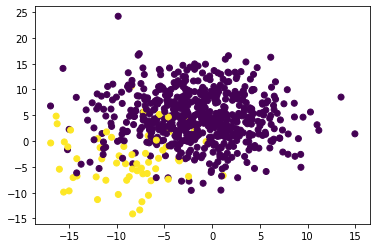

In [89]:
# unbalanced dataset with two classes is artificially created and plotted,
X, y = make_blobs(n_samples = [600, 60], random_state=1, cluster_std=5) 
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [90]:
# split into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Python's Counter module con􀂦rms the imbalance in the training set.
Counter(y_train)

Counter({0: 451, 1: 44})

In [92]:
!pip install -U imbalanced-learn

In [93]:
# randomly oversample the minority class with the imblearn library.
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({0: 451, 1: 451})

In [97]:
# With a resampled dataset, we can now carry out the familiar pattern of training a model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
print (confusion_matrix(y_test, y_pred))

# accuracy score of the model
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred))

[[131  18]
 [  1  15]]
0.9083473154362416


In [98]:
# classi􀂦cation report to assess the results further
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.88      0.94      0.93      0.91      0.82       149
          1       0.45      0.94      0.88      0.61      0.91      0.83        16

avg / total       0.94      0.88      0.93      0.90      0.91      0.82       165



### Synthetic minority oversampling technique (SMOTE)
**In SMOTE, like random oversampling, the size of the minority is increased by interpolating**
**a number of its closest neighbors is chosen from the minority class**

In [101]:
## use the SMOTE module from the imblearn library to oversample the minority class.
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,sampling_strategy='auto').fit_resample(
X_train, y_train)

Counter(y_resampled)

Counter({0: 451, 1: 451})

In [102]:
# train a LogisticRegression model, predict, then assess the accuracy and generate a confusion_matrix
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.89      0.94      0.94      0.91      0.83       149
          1       0.48      0.94      0.89      0.64      0.91      0.84        16

avg / total       0.94      0.90      0.93      0.91      0.91      0.83       165



### Undersampling

Implement the cluster centroids and random undersampling techniques with the credit card default data. Then estimate a logistic regression model and report the classification evaluation metrics from both sampling methods. 

ln_balance_limit is the log of the maximum balance they can have on the card; 1 is female, 0 male for sex; the education is denoted: 1 = graduate school; 2 = university; 3 = high school; 4 = others; 1 is married and 0 single for marriage; default_next_month is whether the person defaults in the following month (1 yes, 0 no).

**RandomUnderSampler module**

In [103]:
#import module and data
import pandas as pd
from path import Path
from collections import Counter

data = Path('resources/cc_default.csv')
df = pd.read_csv(data)
df.head()

,ID,ln_balance_limit,sex,education,marriage,age,default_next_month
0,1,9.903488,1,2,0,24,1
1,2,11.695247,1,2,1,26,1
2,3,11.407565,1,2,1,34,0
3,4,10.819778,1,2,0,37,0
4,5,10.819778,0,2,0,57,0


In [104]:
# The features are all columns in the dataset, except ID and default_next_month , 
# with the former not a useful predictor of default status and the latter the target.

x_cols = [i for i in df.columns if i not in ('ID', 'default_next_month')]
X = df[x_cols]
y = df['default_next_month']

In [105]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [106]:
# use imblearn 's RandomUnderSampler module to train the
# RandomUnderSampler instance, then undersample the majority class.
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 4968, 1: 4968})

In [107]:
# LogisticRegression model will be used again on the dataset
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

# make predictions and generate a confusion_matrix .
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3732, 2100],
       [ 740,  928]], dtype=int64)

In [114]:
# calculate the balanced_accuracy_score
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred))

# print the classi
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

0.5981363057701987
                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.64      0.56      0.72      0.60      0.36      5832
          1       0.31      0.56      0.64      0.40      0.60      0.35      1668

avg / total       0.72      0.62      0.57      0.65      0.60      0.36      7500



#### Cluster Centroid Undersampling
The algorithm identiifies clusters of the majority class, then generates synthetic data points, 
called centroids, that are representative of the clusters.

use the imblearn's ClusterCentroids module.

In [116]:
# instantiate the resampling module and use it to resample the data
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

# instantiate and train a logistic regression model.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [117]:
# generate the metrics
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
print (confusion_matrix(y_test, y_pred))

from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred))

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

[[2832 3000]
 [ 602 1066]]
0.5623427184178583
                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.49      0.64      0.61      0.56      0.31      5832
          1       0.26      0.64      0.49      0.37      0.56      0.32      1668

avg / total       0.70      0.52      0.60      0.56      0.56      0.31      7500



### Combination Sampling

Implement the SMOTEENN technique with the credit card default data. Then estimate a logistic regression model and report the classification evaluation metrics.

1. Oversample the minority class with SMOTE.

2. Clean the resulting data with an undersampling strategy. If the two nearest neighbors of a data point belong to two different classes, that data point is dropped.

In [118]:
# import module

import pandas as pd
from path import Path
from collections import Counter

data = Path('resources/cc_default.csv')
df = pd.read_csv(data)
df.head()

,ID,ln_balance_limit,sex,education,marriage,age,default_next_month
0,1,9.903488,1,2,0,24,1
1,2,11.695247,1,2,1,26,1
2,3,11.407565,1,2,1,34,0
3,4,10.819778,1,2,0,37,0
4,5,10.819778,0,2,0,57,0


In [120]:
# RandomUnderSampler module
x_cols = [i for i in df.columns if i not in ('ID', 'default_next_month')]
X = df[x_cols]
y = df['default_next_month']

# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [121]:
# import the SMOTEENN module and create an instance of SMOTEENN, which resamples the dataset
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [122]:
# LogisticRegression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [123]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

# balanced_accuracy_score

from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred))

# classification report

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))


[[4172 1660]
 [ 882  786]]
0.5932932666212709
                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.72      0.47      0.77      0.58      0.35      5832
          1       0.32      0.47      0.72      0.38      0.58      0.33      1668

avg / total       0.71      0.66      0.53      0.68      0.58      0.34      7500

